# crawl delicious food in tw

In [1]:
from bs4 import BeautifulSoup as bs
import urllib
import re     #导入正则
import pandas as pd
import requests
import jieba     #导入结巴分词
import jieba.analyse

In [2]:
headers = {'Host':'www.go2tw.cn',
        'Referer':'http://www.go2tw.cn/',
        'method':'GET',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36',
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding':'gzip, deflate',
        'Accept-Language':'zh-CN,zh;q=0.9'}

In [3]:
r = requests.get('http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052')
print(r.encoding)

utf-8


In [4]:
headers = {'Host':'www.go2tw.cn',
        'Referer':'http://www.go2tw.cn/',
        'method':'GET',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36',
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'Accept-Encoding':'gzip, deflate',
        'Accept-Language':'zh-CN,zh;q=0.9'}

have_next_page = True
page_index = 1
new_request_url = 'http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052'
while have_next_page:
    this_page = requests.get(new_request_url).text
    page_model = bs(this_page,'lxml')
    sneck_articles = page_model.find_all(name='strong',class_='title')
    for i,article in enumerate(sneck_articles):
        print(f'第{i+1}篇文章')
        article_url = article.a['href']
        article_content = requests.get(article_url).text
        article_soup = bs(article_content,'lxml')
        article_dom = article_soup.find(class_='detail')
        if article_dom == None:
            continue
        content = article_dom.text
        fout = open('delicious in TW.txt','a+',encoding='utf-8')
        fout.write(content)
        fout.write("***********************（^_^）********************")
        fout.close()
    if page_model.find(text='下一页').find_parent().has_attr('href'):
        next_page_href = page_model.find(text='下一页').find_parent()['href']
        next_page_param = next_page_href[next_page_href.find('__hash__'):]
        new_request_url = new_request_url[0:new_request_url.find('__hash__')] + next_page_param
        page_index += 1
        print(f"new request url:{new_request_url},next page is {page_index}")
    else:
        have_next_page = False
        print('all page crawled done')

第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=2,next page is 2
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=3,next page is 3
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=4,next page is 4
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=5,next page is 5
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章
new request url:http://www.go2tw.cn/search?key=%E7%BE%8E%E9%A3%9F&__hash__=99ed3d97817929b9527e2bdadf9d6052&p=6,next page is 6
第1篇文章
第2篇文章
第3篇文章
第4篇文章
第5篇文章
第6篇文章
第7篇文章
第8篇文章
第9篇文章
第10篇文章

#### 从文件中读取段落做词频统计（在做词频统计之前需要用空格把分词隔开）

In [5]:
fread = open('delicious in TW.txt','r',encoding='utf-8')
all_articles_origin = fread.read()
all_articles_without_space = all_articles_origin.replace(' ','')
all_articles_cn_left_list = re.findall(r'[\u4e00-\u9fff]+',all_articles_without_space)
all_articles_cn_left = " ".join(all_articles_cn_left_list)
all_word_list = list(jieba.cut(all_articles_cn_left,cut_all=False))
delicious_words = " ".join(all_word_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.575 seconds.
Prefix dict has been built succesfully.


In [6]:
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

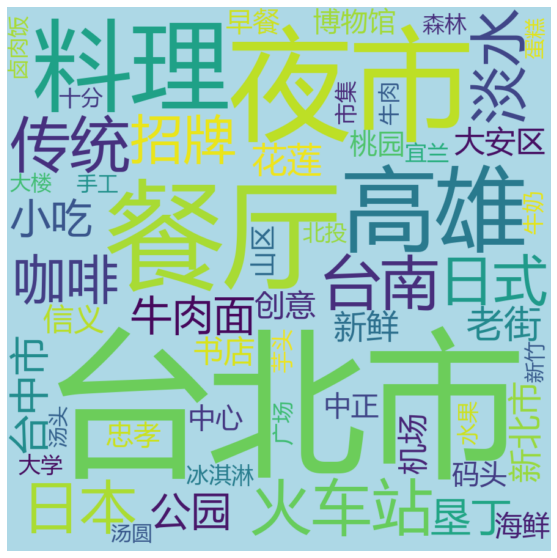

In [11]:
wc = WordCloud(width=890,
              height=890,
              background_color='lightblue',
              max_words=55,
              colormap='viridis',
              collocations=False,
              random_state=5,
              font_path='./fonts/cn/msyh.ttc',
              stopwords=('我们','分钟','美食','如果','图片','来源','网络','除了','不同','没有','时间','小时','起来','以及','因为','可以',
                         '资讯','非常','位于','一个','自由','台湾','地址','还有','成为','许多','大家','开放','交通','建筑','周一','游客',
                         '文化','下车','步行','到达','好玩','一段','园区','捷运','人们','之一','车站','来自','人均','特别','朋友','主题',
                         '历史','景点','客运','特色','周日','游玩','地方','世界','提供','出口','搭乘','推荐','附近','就是','二段','活动',
                         '美味','味道','消费','体验','地点','很多','电话','生活','人气','艺术','店家','口感','使用','看到','自己','店铺',
                         '台北','搭配','来到','商圈','还是','这里','所在','高雄市','假日','周六','一定','即可','所以','更是','各种',
                         '喜欢','设计','台币','公车','营业时间','选择','打卡','拥有','加上','方式','口味','前往','观光','高铁','不仅','以上',
                         '公休','整理','享受','一起','开始','缘由','相当','免费','食材','一般','制作','好吃','适合','参观','店内','温泉',
                         '丰富','一家','理由','服务','错过','现在','风格','网路','欣赏','最大','空间','品尝','老板','全台','火车','而且',
                         '需要','市场','介绍','周五','排队','风味','感受','网友','旅游','这家','拍摄','但是','不能','结合','已经','虽然',
                         '行程','知名','用餐','不少','绝对','著名','台南市','其中','乐园','四段','这个','攻略','充满','民众','平日','独特',
                         '餐点','吸引','美丽','一样','门票','不会','每天','明星','价格','三段','其他','同时','主要','美景','一种','票价',
                         '电影','为主','路线','這裡','自然','最后','周二','故事'))
delicious_wordcloud = wc.generate(delicious_words)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(delicious_wordcloud,interpolation='bilinear')

In [12]:
# 第一个参数：待提取关键词的文本
# 第二个参数：返回关键词的数量，重要性从高到低排序
# 第三个参数：是否同时返回每个关键词的权重
# 第四个参数：词性过滤，为空表示不过滤，若提供则仅返回符合词性要求的关键词
delicious_keyword_sort = jieba.analyse.extract_tags(delicious_words,topK=25,withWeight=True,allowPOS=('a'))
delicious_keyword_sort

[('自由', 0.2794620533613487),
 ('忠孝', 0.22528252288467843),
 ('便当', 0.1548432494786152),
 ('丰富', 0.15124583599151173),
 ('不同', 0.1389082668295701),
 ('精致', 0.12381326880997594),
 ('浓郁', 0.1214757863825268),
 ('独特', 0.11273348750121966),
 ('充满', 0.10920609764582477),
 ('酥脆', 0.10806280075490045),
 ('著名', 0.10142536144101072),
 ('最大', 0.09549155771377162),
 ('浪漫', 0.09436098724814264),
 ('一般', 0.09107349007749618),
 ('复兴', 0.0886105745457099),
 ('简单', 0.07989119495433167),
 ('有名', 0.07585488366735944),
 ('不错', 0.07242846406627652),
 ('软嫩', 0.06799911508978342),
 ('最美', 0.06718079358143075),
 ('方便', 0.06340749986161016),
 ('不腻', 0.061460738638842695),
 ('幸福', 0.061065907104791074),
 ('特殊', 0.05916507394120543),
 ('重要', 0.05838155682820827)]